In [196]:
import os, json, numpy as np
import pandas as pd
import sys, re   
import glob
sys.path.insert(1, 'D:\DystoniaCoalition\DystViz')   
from WebApp.utils import MP4toJson

import numpy as np
import cv2, pickle
cap = None

import matplotlib.pyplot as plt

ret, frame , pid, score =None, None, None, None # Read the frame

openposeOutputDirectory = "C:\DystoniaCoalition\OpenPoseFullFrame\\"

neckData = pd.read_csv("D:\DystoniaCoalition\processed\ExportNeckCSV.csv",)


GDRS = pd.read_excel("D:\DystoniaCoalition\dataset\P1.LV.Koirala.2021.3.30-2_edited.xlsx", sheet_name='GDRS')
GDRS.columns
GDRS.drop(GDRS.columns[[1,2,3,4]],axis=1,inplace=True)
GDRS.rename(columns={ GDRS.columns[0]: "PID" }, inplace = True)
GDRS = GDRS.loc[:, ~GDRS.columns.str.startswith('Unnamed')].iloc[1:].reset_index(drop=True)
GDRS['PID'] = GDRS['PID'].apply(lambda x: re.findall("\d+", x)[0])
# GDRS

def plotScore():
    global score
    score = GDRS[GDRS['PID']==str(pid)].values[0][4:6]
    return plt.text(120, 300, 
             'PID: '+ str(pid)+'\nLarynx: '+ str(score[0])+ '\nNeck: '+ str(score[1]),
             horizontalalignment='center', bbox=dict(facecolor='white', alpha=0.5))

### Processings for frame  normalization to 120

In [ ]:
# _openposeOutputsMain =  os.listdir(openposeOutputDirectory) 

# total = {}
# for openposeOutputsMain in _openposeOutputsMain:
#     global pid, score
#     ## choose one of the file for now
    
#     videoFilePath = os.path.join("D:\DystoniaCoalition\RawVideos\\", openposeOutputsMain)
#     # print(openposeOutputsMain)
#     print("", end='.')


#     #get pid
#     try:
#         pid = int(openposeOutputsMain.split("_")[0].replace("DYS", " "))
#     except:
#         pid = int(openposeOutputsMain.split(" ")[0].replace("DYS", " "))

#     TotalFrames, JsonDict = MP4toJson(openposeOutputsMain, openposeOutputDirectory)
#     _JsonDict = dict(JsonDict)  #same thing in dict format
#     # plotallpoints()
#     # exportGIF()
#     total[pid]=JsonDict

# # DUMP AND GET DATA
# import pickle
# with open('D:\DystoniaCoalition\processed\\annotatios_RawCroppedFramesAll.pickle', 'wb') as handle:
#     pickle.dump(total, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('D:\DystoniaCoalition\processed\\annotatios_RawCroppedFramesAll.pickle', 'rb') as handle:
#     _data = pickle.load(handle)


# # CONVERT DATA TO PANDAS DF
# from itertools import islice
# import os
# from IPython.display import clear_output


# allScores = []
# from operator import itemgetter
# colu= [("Dystonia",'PID'), ("Dystonia",'FID'), ("NOSE",'x'),("NOSE",'y'), ("NECK",'x'),("NECK",'y'), ("RSHO",'x'),("RSHO",'y'), 
#        ("RELB",'x'),("RELB",'y'), ("RWRI",'x'),("RWRI",'y'), ("LSHO",'x'),("LSHO",'y'), ("LELB",'x'),("LELB",'y'), 
#        ("LWRI",'x'),("LWRI",'y'), ("MHIP",'x'),("MHIP",'y'), ("RHIP",'x'),("RHIP",'y'), ("RKNE",'x'),("RKNE",'y'), ("RANK",'x'),
#        ("RANK",'y'), ("LHIP",'x'),("LHIP",'y'), ("LKNE",'x'),("LKNE",'y'), ("LANK",'x'),("LANK",'y'), ("REYE",'x'),
#        ("REYE",'y'), ("LEYE",'x'),("LEYE",'y'), ("REAR",'x'),("REAR",'y'), ("LEAR",'x'),("LEAR",'y'), ("LBTO",'x'),("LBTO",'y'), 
#        ("LSTO",'x'),("LSTO",'y'), ("LHEL",'x'),("LHEL",'y'), ("RBTO",'x'),("RBTO",'y'), ("RSTO",'x'),("RSTO",'y'), 
#        ("RHEL",'x'),("RHEL",'y'),]

# rows_list  = []
# for key, value in _data.items():
#     for framex in value:
#         if len(framex):
#             for coords in framex[1]:
#                 if (coords):
#                     dict1 ={ ("Dystonia",'PID'): key,  ("Dystonia",'FID'): framex[0],}
#                     for coord in coords:
#                         dict1[colu[int(coord[2])*2+2]]=coord[0]
#                         dict1[colu[int(coord[2])*2+3]]= coord[1]
#                     rows_list.append(dict1)
# df_fullframe = pd.DataFrame(rows_list)
# df_fullframe.columns =  pd.MultiIndex.from_tuples(df_fullframe.columns, names=['Part', 'Coord'])
# df_fullframe.to_pickle("./df_fullframe.pkl")
  
# df_fullframe = pd.read_pickle("./df_fullframe.pkl") 

# #filter to 120 frames
# sample_num = 120
# df_fixedframe = df_fullframe.loc[df_fullframe.index.intersection([x for b in 
#                 [[_df.index[int(i)] for i in  np.linspace(0, len(_df.index)-1, sample_num)] 
#                  for name, _df in df_fullframe.dropna(subset=[('NECK', 'x')]).dropna(subset=[('NOSE', 'x')])
#                                                 .groupby(('Dystonia','PID'))]
#             for x in b])]

# df_fixedframe.to_pickle("./df_fixedframe.pkl")  

In [ ]:
df_fixedframe = pd.read_pickle("./df_fixedframe.pkl")

## Plot all point at once

In [ ]:
import matplotlib.pyplot as plt

def plotallpoints():
    global cap, ret, frame, score, JsonDict, videoFilePath
    cap = cv2.VideoCapture(videoFilePath) #video_name is the video being called
    cap.set(1,JsonDict[0][0]); # Where frame_no is the frame you want
    ret, frame = cap.read() # Read the frame

    plt.figure(figsize=(10,10))
    #check if has Keypoints
    # kp = _JsonDict.get(int(cap.get(cv2.CAP_PROP_POS_FRAMES)))[0]
    # if _JsonDict.get(int(cap.get(cv2.CAP_PROP_POS_FRAMES)))[0]:
    data = {'x': [e[0] for idx, eachFrame in enumerate(JsonDict) for p in eachFrame[1] for e in p],
            'y': [e[1] for idx, eachFrame in enumerate(JsonDict) for p in eachFrame[1] for e in p],}
    plt.scatter(x=data["x"], y=data["y"], color="red", s=0.1)
    plt.rcParams["figure.figsize"] = (20,3)
    plotScore()
    plt.imshow(frame)
    # plt.show()
    plt.savefig("D:\DystoniaCoalition\processed\gifs\\total\\DYS_"+str(pid)+"_Neck_"+ str(score[1])+ ".png" )
    plt.clf()
# plotallpoints()

In [ ]:
def exportGIF():
    global cap, ret, frame, score, JsonDict, videoFilePath

    ims=[]
    import matplotlib.animation as animation

    fig = plt.figure()

    cap.set(1,JsonDict[0][0]); # Where frame_no is the frame you want

    for frm in JsonDict:
        kp = frm[0]
        cap.set(1,kp)
        ret, frame = cap.read()
        ims.append([plt.imshow(frame), plotScore(),
                    plt.scatter(x=[e[0] for e in frm[1][0]], y=[e[1] for e in frm[1][0]], color="red", s=10) ])

    ani = animation.ArtistAnimation(fig, ims, interval=200, blit=True, 
                                    repeat_delay=500)
    ani.save("D:\DystoniaCoalition\processed\gifs\\DYS_"+str(pid)+"_Neck_"+ str(score[1])+ ".gif", writer='imagemagick', dpi=60)
    plt.clf()
# exportGIF()

In [ ]:
# # clasic method for  plotting: loop ovr videos
# _openposeOutputsMain =  os.listdir(openposeOutputDirectory) 
# for openposeOutputsMain in _openposeOutputsMain:
#     global pid, score
#     videoFilePath = os.path.join("D:\DystoniaCoalition\RawVideos\\", openposeOutputsMain)
#     videoFilePath = "D:\DystoniaCoalition\RawVideos\DYS1001_20170222.mp4"
#     # print(openposeOutputsMain)
#     print("", end='.')
#     #get pid
#     try:
#         pid = int(openposeOutputsMain.split("_")[0].replace("DYS", " "))
#     except:
#         pid = int(openposeOutputsMain.split(" ")[0].replace("DYS", " "))

#     JsonDict = ff_data[pid]
#     _JsonDict = dict(JsonDict)  #same thing in dict format
#     plotallpoints()
#     exportGIF()

# Loop to create animations

In [ ]:
toFixedFrame = False
if toFixedFrame:
    for name, _df in df_fixedframe.groupby(('Dystonia','PID')):
        # global pid, score, videoFilePath, 
        _videoFilePath = glob.glob("D:\DystoniaCoalition\RawVideos\\DYS"+ str(name)+"_*.mp4")
        assert len(_videoFilePath)==1
        videoFilePath = _videoFilePath[0]  
        pid = int(name)
        # print("", end='.')
        TOJsonDict = []
        for r in _df.iterrows():
            coordinates =[]
            # print("sur", list(r[1]), "..")
            for idx, each in enumerate(zip(list(r[1])[::2],list(r[1])[1::2])):
                # print(idx, each, idx>=1 and isinstance(each, tuple))
                if (idx>=1 and isinstance(each, tuple)):
                    coordinates.append([each[0], each[1], int(idx)-1])
            
            TOJsonDict.append([r[1][1],[coordinates] ] )
            # print(coordinates)
            
        JsonDict = TOJsonDict
        _JsonDict = dict(JsonDict) 
        plotallpoints()
        exportGIF()

# Forward Fill the missing value

In [ ]:
df_fixed8 = df_fixedframe.loc[:,  df_fixedframe.columns.get_level_values(0).isin(['Dystonia', 'NOSE', 'RSHO', 'LSHO','NECK',  'REYE', 'LEYE', 'REAR', 'LEAR'])]
# print("Missing Values in each coorinates:")
# print(df_fixed8.isna().sum()[::2])

_df_fixed8 = df_fixed8.copy()

# for name, _df in _df_fixed8.groupby(('Dystonia','PID')):
#     _df_fixed8.fillna(method='ffill', inplace=True)

_df_fixed8.fillna(method='ffill', inplace=True)
# print("After filling missing values:")
_df_fixed8.isna().sum()[::2]
pass

In [201]:
#pairplot 
# 
import seaborn as sns

std = _df_fixed8.groupby(by=lambda x: x%120, axis=0).transform(lambda x: abs(x - x.mean()) / x.std())
k = std.loc[:, std.columns.get_level_values(1).isin(['y'])]
k.columns = k.columns.droplevel(1)
mm = k[k['NOSE'] <= 3][k['NOSE'] >= -3][k['RSHO'] <= 3][k['RSHO'] >= -3]

# sns.pairplot(mm,)

# mm
# _df_fixed8

mm['score'] = _df_fixed8.loc[mm.index][('Dystonia', 'PID')].apply(lambda x: GDRS[GDRS['PID']==str(x)].values[0][4])
# mm

C:\Users\susan\AppData\Local\Temp\ipykernel_17124\2607362853.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mm = k[k['NOSE'] <= 3][k['NOSE'] >= -3][k['RSHO'] <= 3][k['RSHO'] >= -3]


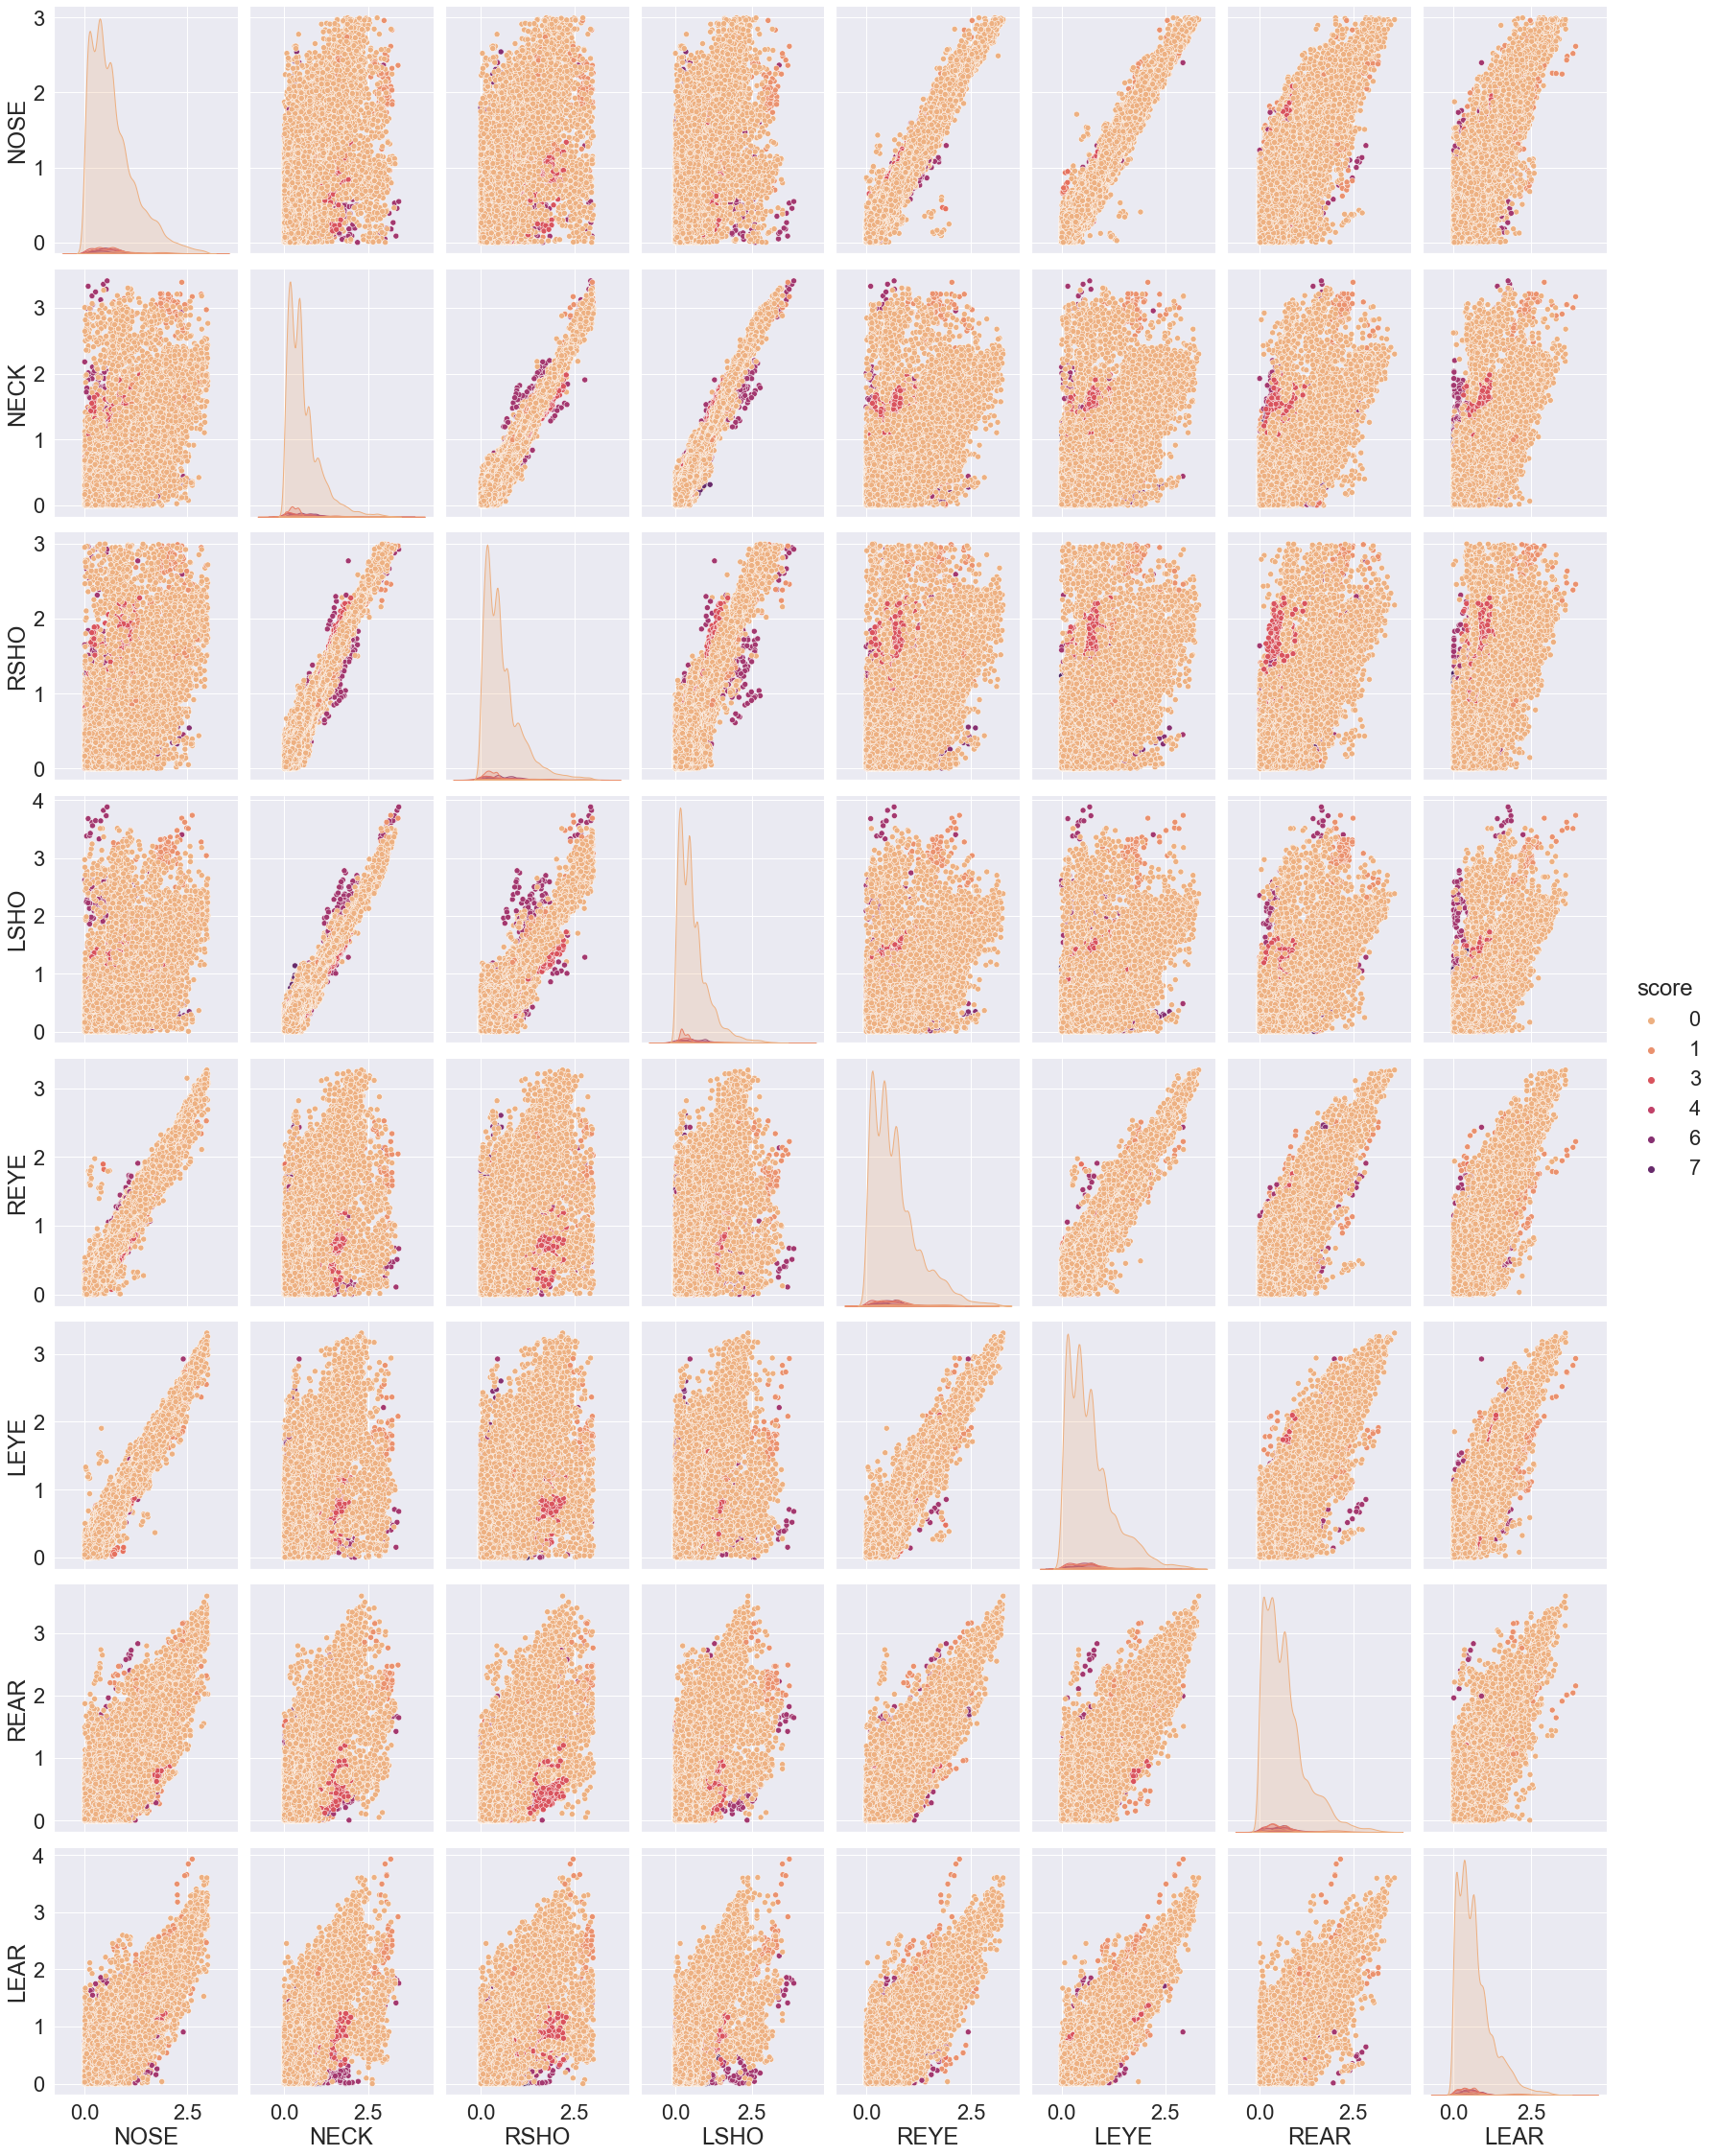

In [202]:
sns.set(font_scale = 2)
sns.pairplot(mm, hue='score', palette='flare', height=4, aspect=0.75)

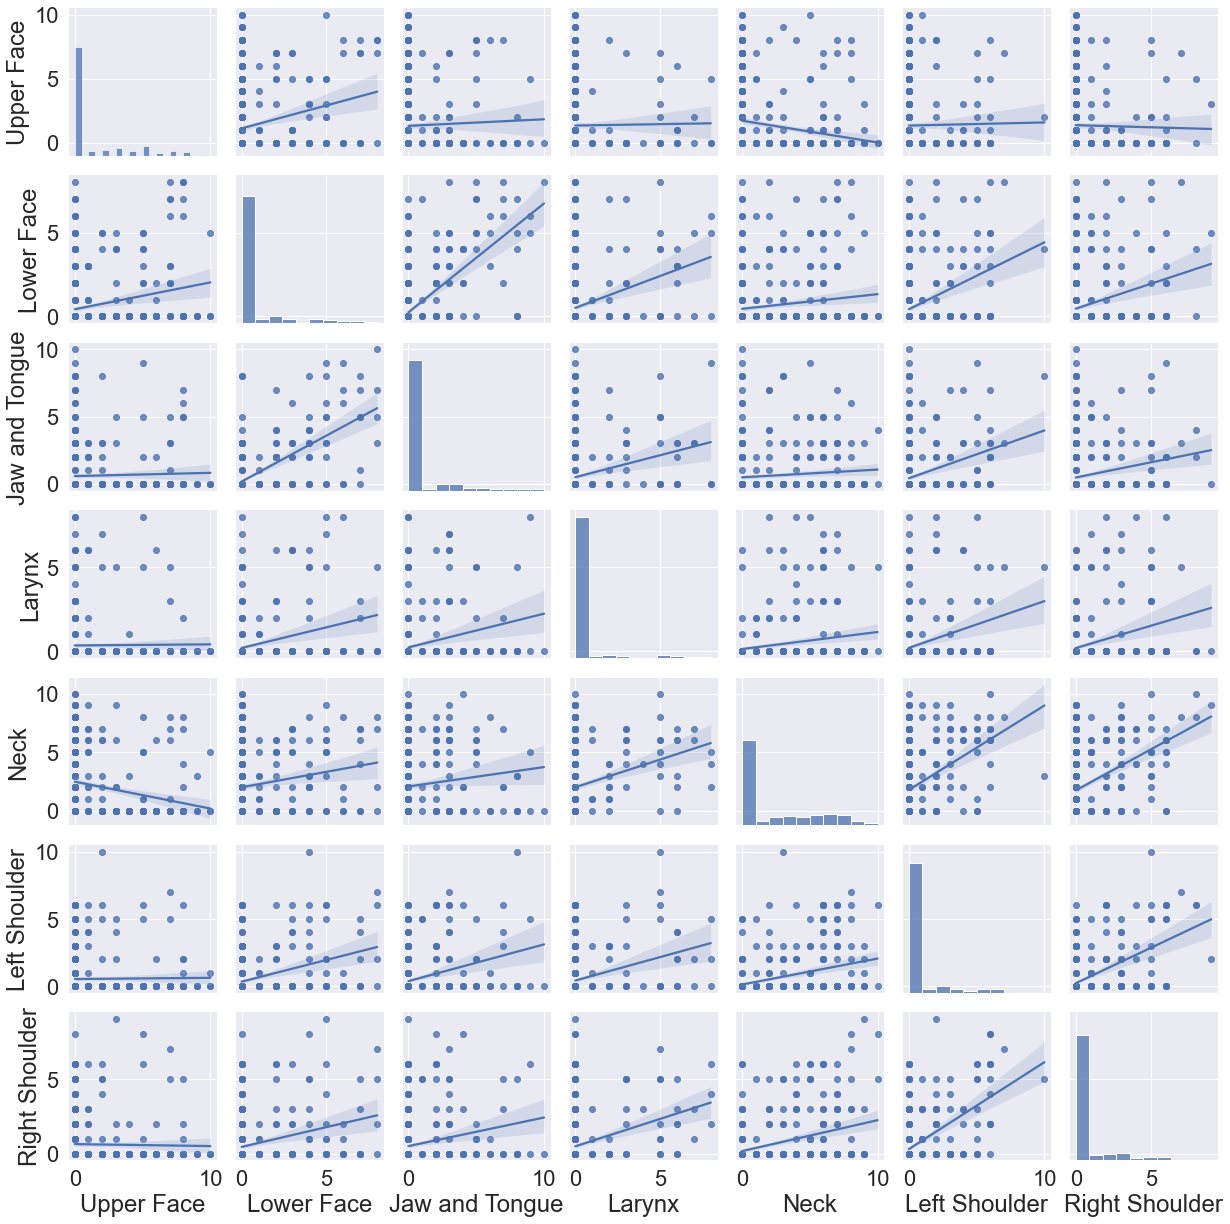

In [198]:
GDRS.columns = ['PID', 'Upper Face', 'Lower Face', 'Jaw and Tongue', 'Larynx',
       'Neck', 'Left Shoulder',
       'Right Shoulder', 'Left Elbow/',
       'Right Elbow', 'Pelvis and Upper Leg - Left',
       'Pelvis and Upper Leg - Right', 'Distal Leg and Foot - Left',
       'Distal Leg and Foot - Right', 'Trunk']

sns.pairplot(GDRS.drop(columns=['PID', ]).astype(float).iloc[:,0 : 7], kind="reg" )

In [199]:
GDRS

,PID,Upper Face,Lower Face,Jaw and Tongue,Larynx,Neck,Left Shoulder,Right Shoulder,Left Elbow/,Right Elbow,Pelvis and Upper Leg - Left,Pelvis and Upper Leg - Right,Distal Leg and Foot - Left,Distal Leg and Foot - Right,Trunk
0,9,0,0,2,0,0,0,0,0,0,0,0,0,0,0
1,31,0,0,2,0,0,0,0,0,0,0,0,0,0,0
2,36,0,0,0,0,3,0,0,0,0,0,0,0,0,0
3,41,0,0,0,0,6,0,0,0,0,0,0,0,0,0
4,46,0,0,0,0,5,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,3316,9,0,0,0,0,0,0,0,0,0,0,0,0,0
449,3324,0,0,0,0,0,0,0,0,0,0,0,1,0,0
450,3494,5,0,0,0,0,0,0,0,0,0,0,0,0,0
451,3495,5,0,0,0,0,0,0,0,0,0,0,0,0,0


In [188]:
import seaborn as sns
corr = GDRS.drop(columns=['PID', ]).corr()

GDRS.drop(columns=['PID', ])

""


## Normalize the data

In [ ]:
# Divide by shoulder length and _subtract the Nose coordinate 
norm_df_fixed8 = _df_fixed8.copy()
for name, _df in norm_df_fixed8.groupby(('Dystonia','PID')):
    
    diff = (_df[('LSHO', 'x')].mean() - _df[('RSHO', 'x')].mean())  # we want this distance to be 10
    xvals = _df.iloc[:, _df.columns.get_level_values(1)=='x']
    xvals = (xvals- _df[('NOSE', 'x')].mean())/diff
    yvals = _df.iloc[:, _df.columns.get_level_values(1)=='y']
    yvals = (yvals- _df[('NOSE', 'y')].mean())/diff
    
    norm_df_fixed8.update(xvals)
    norm_df_fixed8.reset_index()
    norm_df_fixed8.update(yvals)
    norm_df_fixed8.reset_index()

# norm_df_fixed8

# norm_df_fixed8.to_hdf("./norm_df_fixed8.hdf", key='han')

In [ ]:
# see individual data
norm_df_fixed8[norm_df_fixed8[('Dystonia','PID')]==9]

In [ ]:
# plot linePlots_all for all the data
if 0:
    for pid, _df in norm_df_fixed8.groupby(('Dystonia','PID')):
        # pid= 9
        score = GDRS[GDRS['PID']==str(pid)].values[0][4:6]
        ax = plt.subplot(211, )
        ax = norm_df_fixed8[norm_df_fixed8[('Dystonia','PID')]==pid].loc[:,  norm_df_fixed8.columns.get_level_values(1).isin(['x'])].plot(figsize=(20,10),  ylim=(-0.8,0.8), ax=ax)
        plt.ylabel("X-coordinate")

        ax2 = plt.subplot(212, sharex=ax)
        norm_df_fixed8[norm_df_fixed8[('Dystonia','PID')]==pid].loc[:,  norm_df_fixed8.columns.get_level_values(1).isin(['y'])].plot(figsize=(20,10),  ylim=(-0.8,0.8), ax=ax2)
        ax2.text(0, -0.1, 'PID: '+ str(pid)+' Larynx: '+ str(score[0])+ ' Neck: '+ str(score[1]),  transform=ax.transAxes, fontsize=20)
        plt.ylabel("Y-coordinate")
        plt.xlabel("Frames -->")

        # plt.show()
        plt.savefig('D:\DystoniaCoalition\processed\linePlots_all\PID_'+ str(pid)+'_Larynx'+ str(score[0])+ '_Neck'+ str(score[1]) +'.png', bbox_inches='tight')
        plt.clf()


In [ ]:
GDRS[GDRS['PID'].isin(list(norm_df_fixed8[('Dystonia', 'PID')].unique().astype(str)))].iloc[:,4:6]

# Combine GIFs and line plots

In [ ]:
import io, PIL, imutils
import matplotlib.animation as animation
from matplotlib import pyplot as plt

# plot linePlots_all for all the data
if 0:
    for pid, _df in norm_df_fixed8.groupby(('Dystonia','PID')):
        if int(pid)< 0: continue
        
        # pid= 36
        fig = plt.figure("Animation", figsize=(15,7), tight_layout=True,)

        ax = fig.add_subplot(111)
        ax.axis('off')
            
        _videoFilePath = glob.glob("D:\DystoniaCoalition\RawVideos\\DYS"+ str(pid)+"_*.mp4")
        assert len(_videoFilePath)==1
        videoFilePath = _videoFilePath[0]  
        # print(videoFilePath)
        cap = cv2.VideoCapture(videoFilePath) #video_name is the video being called

        score = GDRS[GDRS['PID']==str(pid)].values[0][4:6]
        ims = [] 
        buf= io.BytesIO()
        
        x_plot = _df.loc[:,  _df.columns.get_level_values(1).isin(['x'])].plot(figsize=(20,10),  ylim=(-0.8,0.8))
            
        x_plot.annotate('PID: '+ str(pid)+' Larynx: '+ str(score[0])+ ' Neck: '+ str(score[1]),  xy=(list(_df[('Dystonia','FID')].index)[0], -0.8), 
                    xytext=(10, 10), textcoords='offset points', fontsize=20, )

        m = x_plot.axvline(x=list(_df[('Dystonia','FID')].index)[0], color='b',  linestyle='-')

        # break
        for idx, r in _df.iterrows():
            m.set_xdata(idx)
            buf.flush()
            buf.seek(0)
            x_plot.get_figure().savefig(buf, format='png', bbox_inches='tight', pad_inches=0  )
            cap.set(1,int(list(r)[1]))
            ret, frame = cap.read() # Read the frame
            
            df_fixed8_value = df_fixed8[df_fixed8.index.isin([idx])].values[0]

            s = ax.scatter(x=df_fixed8_value[2::2], y=df_fixed8_value[3::2], color="red", s=30)
            a = ax.imshow(frame, alpha=0.3)

            b = ax.imshow(PIL.Image.open(buf))
            b.zorder = a.zorder - 1
            s.zorder = a.zorder + 1

            ims.append([ a, b, s] )
            # plt.clf()
        # break
        print(len(ims))
        plt.tight_layout()
        ani = animation.ArtistAnimation(fig, ims, interval=200, blit=True, repeat_delay=500, repeat=True)
        ani.save(
            "D:\\DystoniaCoalition\\processed\\xlinePlot_and_gifs\\DYS_"+str(pid)+"_Neck_"+ str(score[1])+ ".gif", writer='imagemagick', dpi=60)
        plt.clf()
        fig.clear()
        plt.close(fig)
        # break

Average mean  and standard deviation plot

In [ ]:
from matplotlib import pyplot as plt
if 0:
    for _score in range(10):
        # _score = '0 to 9'
        # filtered = GDRS.loc[GDRS[' Neck'] <1000].values.astype(float).flatten().tolist()

        filtered = GDRS.loc[GDRS[' Neck'] ==_score][['PID']].values.astype(int).flatten().tolist()
        filtered_df = norm_df_fixed8[norm_df_fixed8[('Dystonia','PID')].isin(filtered)]
        filtered_df = filtered_df.reset_index(drop=True).groupby(by=lambda x: x%120, axis=0).std()
        filtered_df.loc[:,  filtered_df.columns.get_level_values(1).isin(['x'])].plot(figsize=(20,10), ylim=(0,0.5))
        plt.annotate('σ of Score: '+ str(_score),  xy=(20, 0.45),fontsize=20)
        # print('D:\DystoniaCoalition\processed\\averagePLot\\Average_score_'+ str(_score)  +'.png')
        plt.savefig('D:\DystoniaCoalition\processed\\averagePLot\\Std_'+ str(_score)  +'.png', bbox_inches='tight')
        pass

In [ ]:
if 0:
    for _score in range(10):
        # _score = '0 to 9'
        # filtered = GDRS.loc[GDRS[' Neck'] <1000].values.astype(float).flatten().tolist()
        
        filtered = GDRS.loc[GDRS[' Neck'] == _score][['PID']].values.astype(int).flatten().tolist()
        filtered_df = norm_df_fixed8[norm_df_fixed8[('Dystonia','PID')].isin(filtered)]
        filtered_df = filtered_df.reset_index(drop=True).groupby(by=lambda x: x%120, axis=0).mean()
        filtered_df.loc[:,  filtered_df.columns.get_level_values(1).isin(['x'])].plot(figsize=(20,10),  ylim=(-0.65,0.65))
        plt.annotate('Average. of Score: '+ str(_score),  xy=(20, 0.45),fontsize=20)
        plt.savefig('D:\DystoniaCoalition\processed\\averagePLot\\Mean_'+ str(_score)  +'.png', bbox_inches='tight')

In [ ]:
pd.DataFrame([[1,2,3,4,5,6,7,8,9,10], [1,2,3,4,5,6,7,8,9,10], [1,2,3,4,5,6,7,8,9,10], sorted([1,2,3,4,5,6,7,8,9,10], reverse=True)] ).std().plot(kind='bar')